# ---- IRIS DATASET ----

In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy.random as npr
from copy import deepcopy
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
iris=datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

X=data.iloc[:,0:4]
Y = data['target']

# K-means using sklearn

In [25]:
k_means = KMeans(n_clusters=3)
k_means.fit(X)
centroids = k_means.cluster_centers_
centroids # matrice 3x4: k x nombre de variables



array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

[5.9016129 5.006     6.85     ]


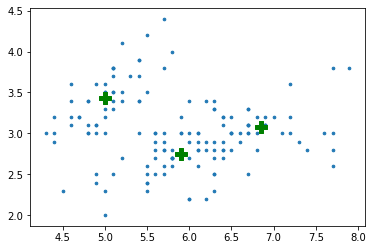

In [28]:
# Plot the data

print(centroids[:,0])
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=7)

plt.scatter(centroids[:,0], centroids[:,1], marker='P', c='g', s=150)

#y_pred_clusters = k_means.labels_

# Initialization

In [39]:
m,n=X.shape[0],X.shape[1]
print(m,n) # m est le nombre d'observations, n est le nombre de variables explicatives.
N=1000 # on choisit de faire 100 itérations
k=3 #3 clusters

150 4


# K means

In [40]:
# Initialisation for lloyd algorithm
def init_random(k,X):
    centroids=np.array([]).reshape(n,0)
    for i in range(k):
        u=npr.randint(0,m-1) #on choisit 'randomly' entre les 150 observations
        centroids=np.c_[centroids,X.iloc[u,:]] # concatenate matrice vide
    centroids=centroids.reshape(k,n)
    print(centroids)
    return centroids


In [45]:
def kmeans_lloyd(k,X):
    
    centroids=init_random(k,X)
    
    error = 10 #random number chosen

    while error > 10**(-10):
        distances=np.zeros((m,k))
        clusters = np.zeros(n)
        for i in range(k):
                distances[:,i]=np.linalg.norm(X-centroids[i,:],axis=1)
        clusters=np.argmin(distances,axis=1)
        centroids_new=deepcopy(centroids)
        for i in range(k):
            centroids_new[i,:]=np.mean(X.iloc[clusters==i,:],axis=0) # on trouve la moyenne pour chq variable
        error = np.linalg.norm(centroids - centroids_new)
        centroids=deepcopy(centroids_new)
        return centroids

In [46]:
centroids_lloyd=kmeans_lloyd(3,X)
print(centroids_lloyd)

[[6.2 6.1 5.1 2.9]
 [2.8 3.8 4.3 4. ]
 [1.5 1.3 1.3 0.3]]
[[6.36413043 2.95       4.96521739 1.7       ]
 [5.21       2.4        3.7        1.19      ]
 [4.97708333 3.4        1.45625    0.24166667]]


[6.36413043 5.21       4.97708333]


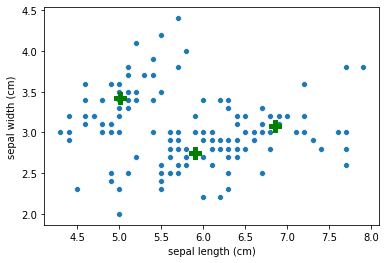

In [47]:
# Plot the data
print(centroids_lloyd[:,0])
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1])
plt.scatter(centroids[:,0], centroids[:,1], marker='P', c='g', s=150)

# K means ++

In [ ]:
m,n=X.shape[0],X.shape[1]
print(m,n) # m est le nombre d'observations, n est le nombre de variables explicatives.
N=1000 # on choisit de faire 100 itérations
k=3 #3 clusters

In [48]:
# Initialisation using probability (kmeans++)
def init_kpp(k,X):
    centroids_rand=np.array([]).reshape(n,0)
    for i in range(k):
        rand=npr.randint(0,m-1)
        centroids_rand=np.c_[centroids_rand,X.iloc[rand,:]]
        
        while len(centroids_rand)<k:
            d2 = np.array([min([np.square(eucl_dist(i,c, None)) for c in temp]) for i in X])
            prob = d2/d2.sum()
            cum_prob = prob.cumsum()
            r = np.random.random()
            ind = np.where(cum_prob >= r)[0][0]
            centroids_rand.append(X[ind])
    centroids_rand=np.array(centroids_rand)
    centroids_rand=centroids_rand.reshape(k,n)
    return centroids_rand

In [49]:
# Performing k_means_lloyd
def kmeans_kpp(k,X):
    
    centroids=init_kpp(k,X)
    
    error = 10 #random number chosen

    while error > 10**(-10):
        distances=np.zeros((m,k))
        clusters = np.zeros(n)
        for i in range(k):
                distances[:,i]=np.linalg.norm(X-centroids[i,:],axis=1)
        clusters=np.argmin(distances,axis=1)
        centroids_new=deepcopy(centroids)
        for i in range(k):
            centroids_new[i,:]=np.mean(X.iloc[clusters==i,:],axis=0) # on trouve la moyenne pour chq variable
        error = np.linalg.norm(centroids - centroids_new)
        centroids=deepcopy(centroids_new)
        return centroids

In [53]:
centroids_kpp=kmeans_kpp(3,X)
print(centroids_kpp)

[[6.68363636 3.04727273 5.44727273 1.94545455]
 [5.7326087  2.6826087  4.19347826 1.32608696]
 [5.00408163 3.42040816 1.45306122 0.24285714]]


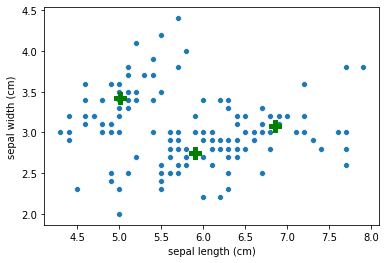

In [52]:
# Plot the data
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1])
plt.scatter(centroids[:,0], centroids[:,1], marker='P', c='g', s=150)